In [ ]:
# Link to Google Colab: https://colab.research.google.com/drive/1omnTRKEN9-bOJuBJq-dpHY5SwLbxeL5O?usp=sharing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
file_url = 'https://raw.githubusercontent.com/lnguye782/ECGR-4105-Intro-to-ML/refs/heads/main/HW2/Housing.csv'
data = pd.read_csv(file_url)

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  13300000  7420         4          2        3      yes        no       no   
 1  12250000  8960         4          4        4      yes        no       no   
 2  12250000  9960         3          2        2      yes        no      yes   
 3  12215000  7500         4          2        2      yes        no      yes   
 4  11410000  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  ,
 None)

In [3]:
# Select relevant columns
selected_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
data_selected = data[selected_columns]

# Features and target variable
X = data_selected.drop(columns='price')
y = data_selected['price']

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (normalize)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert target to numpy arrays
y_train = y_train.values
y_val = y_val.values

# Check processed shapes
X_train_scaled.shape, X_val_scaled.shape, y_train.shape, y_val.shape

((436, 5), (109, 5), (436,), (109,))

In [5]:
# Linear Regression Model using Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def compute_loss(self, y_true, y_pred):
        # Mean Squared Error
        return np.mean((y_true - y_pred) ** 2)

    def train(self, X, y, X_val, y_val):
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)

        train_loss = []
        val_loss = []

        # Training loop
        for epoch in range(self.epochs):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = -(2 / n_samples) * np.sum(y - y_pred)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute loss
            loss = self.compute_loss(y, y_pred)
            train_loss.append(loss)

            # Validation loss
            y_val_pred = np.dot(X_val, self.weights) + self.bias
            val_loss.append(self.compute_loss(y_val, y_val_pred))

            # Print progress every 500 epochs
            if (epoch + 1) % 500 == 0:
                print(f"Epoch {epoch + 1}/{self.epochs}: Train Loss = {loss:.4f}, Validation Loss = {val_loss[-1]:.4f}")

        return train_loss, val_loss

# Train with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")
    model = LinearRegressionGD(learning_rate=lr, epochs=5000)
    train_loss, val_loss = model.train(X_train_scaled, y_train, X_val_scaled, y_val)
    results[lr] = (train_loss, val_loss, model.weights, model.bias)


Training with Learning Rate: 0.1
Epoch 500/5000: Train Loss = 1350008211326.5803, Validation Loss = 2292721545725.3662
Epoch 1000/5000: Train Loss = 1350008211326.5803, Validation Loss = 2292721545725.3662
Epoch 1500/5000: Train Loss = 1350008211326.5803, Validation Loss = 2292721545725.3662
Epoch 2000/5000: Train Loss = 1350008211326.5803, Validation Loss = 2292721545725.3662
Epoch 2500/5000: Train Loss = 1350008211326.5803, Validation Loss = 2292721545725.3662
Epoch 3000/5000: Train Loss = 1350008211326.5803, Validation Loss = 2292721545725.3662
Epoch 3500/5000: Train Loss = 1350008211326.5803, Validation Loss = 2292721545725.3662
Epoch 4000/5000: Train Loss = 1350008211326.5803, Validation Loss = 2292721545725.3662
Epoch 4500/5000: Train Loss = 1350008211326.5803, Validation Loss = 2292721545725.3662
Epoch 5000/5000: Train Loss = 1350008211326.5803, Validation Loss = 2292721545725.3662

Training with Learning Rate: 0.01
Epoch 500/5000: Train Loss = 1350009010876.5654, Validation Lo

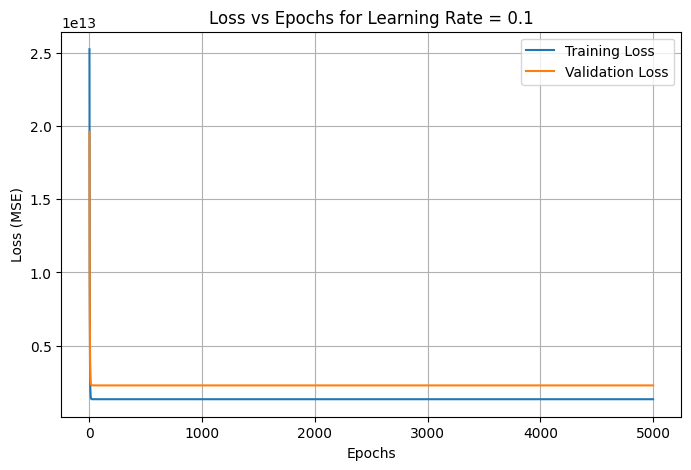

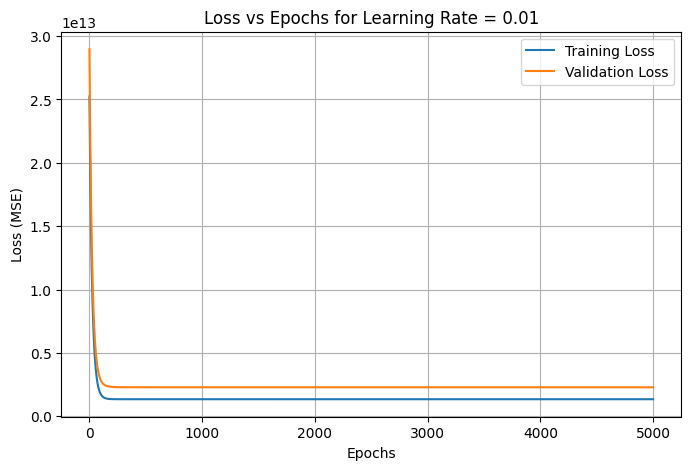

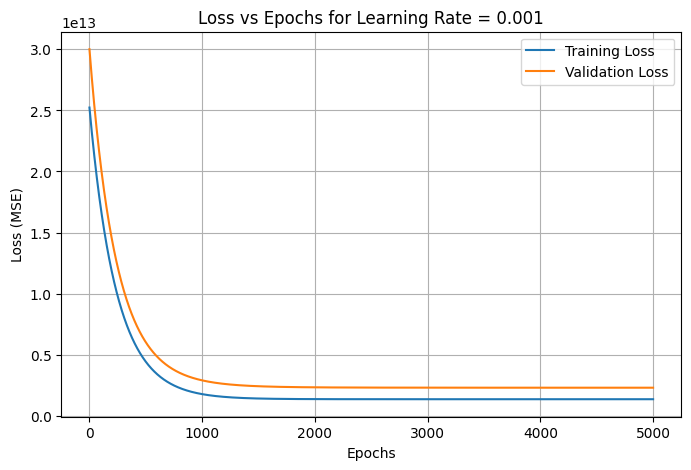

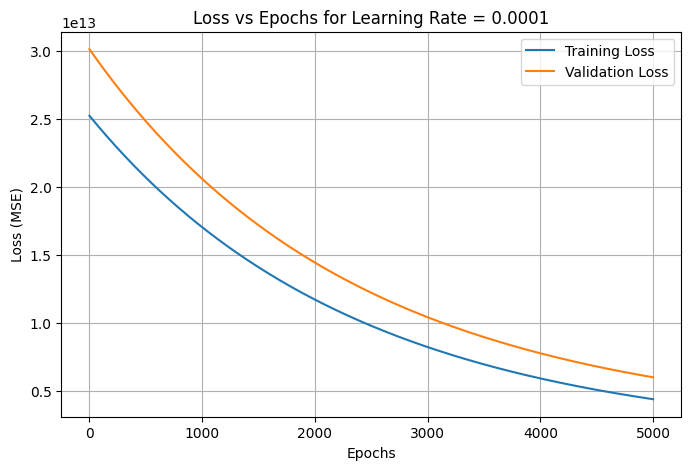

In [8]:
# Plot Training and Validation Loss for each learning rate
for lr, (train_loss, val_loss, _, _) in results.items():
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss")
    plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss")
    plt.title(f"Loss vs Epochs for Learning Rate = {lr}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid()
    plt.show()